In [1529]:
#Importing Required packages
import pandas as pd
import os,glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None

# Part 1-A 

In [1530]:
#Reading data for Part 1-A file
data=pd.read_csv(r'C:\Apps\Abhinav DND\Upgrad\EDA and Statistics\Exploratory Data Analysis\GDP Analysis\Progress\Data I-A.csv',engine='python')
#Removing West Bengal Column
data=data.drop('West Bengal1',1)

In [1531]:
#Checking whether it got imported right or not
data.head()

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.0,11063.0,143175.0,247144.0,158074.0,42367.0,615606.0,297539.0,...,751485.0,359433.0,19208.0,724049.0,115523.0,3979.0,18768.0,343767.0,16818.0,8736039.0
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.0,12547.0,156864.0,282368.0,177511.0,38120.0,724495.0,347032.0,...,855481.0,401493.0,21663.0,822903.0,131835.0,4421.0,21609.0,391238.0,18875.0,9946636.0
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.0,14602.0,177745.0,317101.0,206690.0,35921.0,807623.0,400662.0,...,971090.0,452186.0,25593.0,944146.0,149817.0,5159.0,24787.0,443783.0,21870.0,11236635.0
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.0,16761.0,198098.0,373920.0,234982.0,40633.0,895027.0,437462.0,...,1092564.0,511178.0,29667.0,1043371.0,161985.0,5721.0,27844.0,492424.0,24089.0,12433749.0
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.0,18784.0,224234.0,413503.0,260776.0,45002.0,994316.0,485184.0,...,1212668.0,575631.0,NaN,1153795.0,184091.0,NaN,30304.0,551963.0,26533.0,13675331.0


In [1532]:
#Removing the rows: '(% Growth over the previous year)' and 'GSDP - CURRENT PRICES (` in Crore)' for the year 2016-17 and loading it into a new dataframe Percentage
Percentage=data[(data['Duration']!='2016-17')]

### The average growth of states for the duration 2013-14, 2014-15 and 2015-16


In [1533]:
#Taking out rows with (% Growth over previous year) for the years 2013-14, 2014-15 and 2015-16
Percentage=Percentage[(Percentage['Items  Description']=='(% Growth over previous year)')& (Percentage['Duration']!='2012-13')]
Percentage.reset_index(drop=True) #Rassigning the index from 0 to look better

#Dropping unnecessary columns Duration and Items Description
Percentage =Percentage.drop(['Duration','Items  Description'], 1)

Percentage=Percentage.T   #Transposing the dataframe

#Calculating mean of all the years and storing into a column Average
Percentage['Average']=Percentage.mean(axis=1) 

Percentage.rename(columns = {7:'2013-14',8:'2014-15',9:'2015-16'}, inplace = True) #Renaming column headers to specific years
Percentage.index.name = 'State_Name' #Renaming index to State_Name
Percentage=Percentage.reset_index()  #Resetting index to numbers
Percentage

,State_Name,2013-14,2014-15,2015-16,Average
0,Andhra Pradesh,12.85,13.40,15.85,14.033333
1,Arunachal Pradesh,16.38,14.79,12.07,14.413333
2,Assam,13.31,11.45,13.19,12.650000
3,Bihar,12.30,17.92,10.59,13.603333
4,Chhattisgarh,16.44,13.69,10.98,13.703333
5,Goa,-5.77,13.12,10.75,6.033333
6,Gujarat,11.47,10.82,11.09,11.126667
7,Haryana,15.45,9.18,10.91,11.846667
8,Himachal Pradesh,14.42,10.14,NaN,12.280000
9,Jammu & Kashmir,10.09,4.70,17.91,10.900000


In [1534]:
#Putting list of all Union Territories in a list
UT=['Delhi','Chandigarh','Andaman & Nicobar Islands','Puducherry','Puducherry']
#Selecting the required dataframe without these Union Territories
Percentage=Percentage[~Percentage['State_Name'].isin(UT)] 

In [1535]:
#Sorting the percentage dataframe by Average with highest first
Percentage=Percentage.sort_values(by='Average',ascending=False)

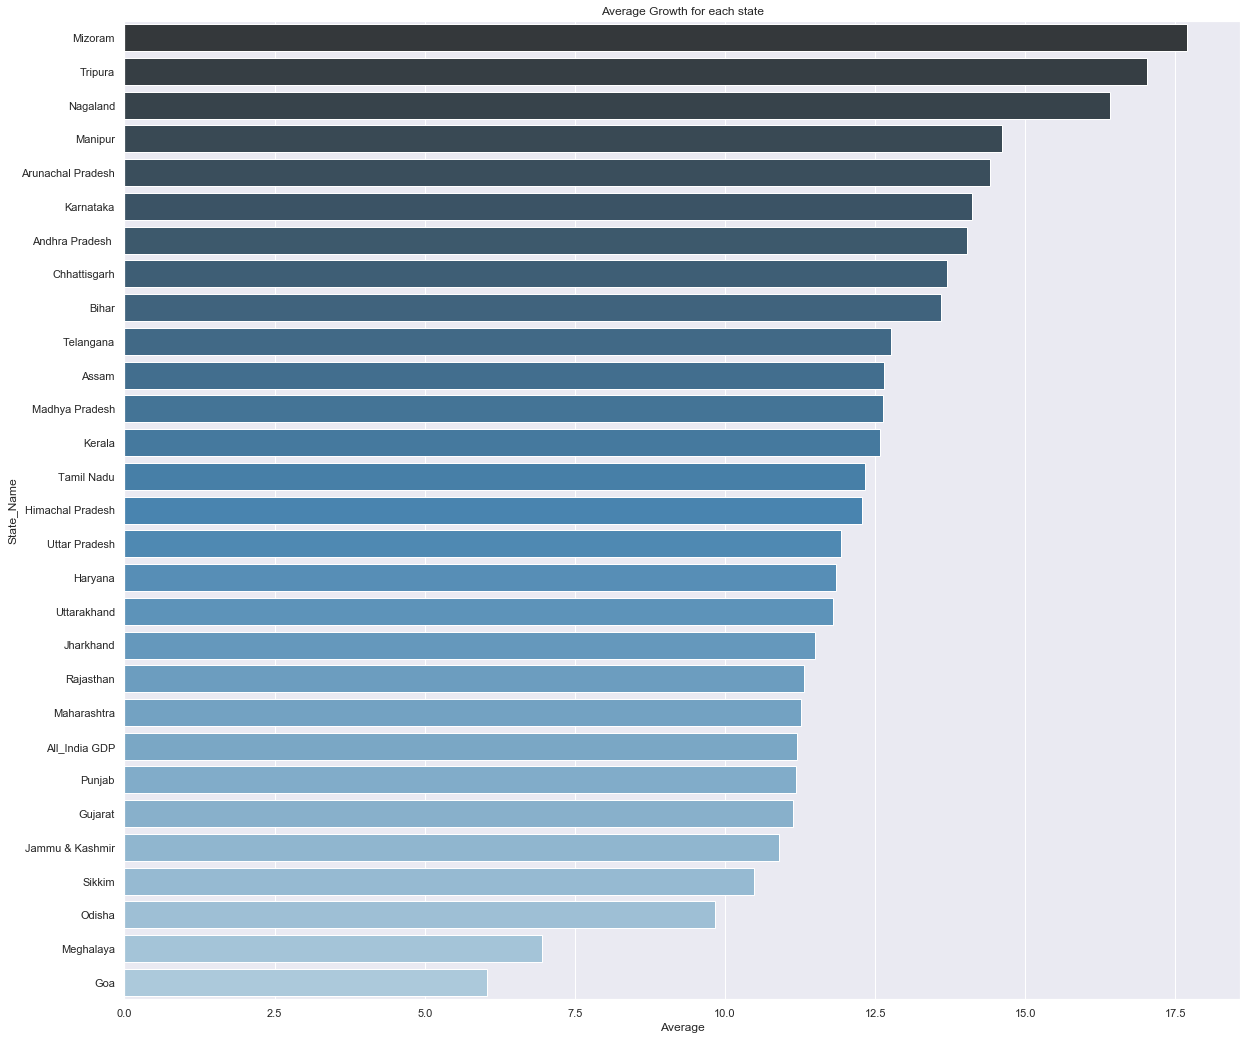

In [1536]:
#Creating a horizontal barplot with % growth rates for each state using seaborn
sns.barplot(x='Average',y='State_Name',data=Percentage,palette='Blues_d').set_title("Average Growth for each state")
sns.set(rc={'figure.figsize':(20,18)}) #Setting the figure size to proper viewing

##### Average growth rate of your home state

In [1537]:
#Taking out home state = Uttar Pradesh and All India GDP for study
Home=Percentage.loc[(Percentage['State_Name']=='Uttar Pradesh')| (Percentage['State_Name']=='All_India GDP')].reset_index(drop=True)
Home #Plotting the dataframe

,State_Name,2013-14,2014-15,2015-16,Average
0,Uttar Pradesh,14.73,10.51,10.58,11.940000
1,All_India GDP,12.97,10.65,9.99,11.203333


### The total GDP of the states for the year 2015-16

In [1538]:
#Creating a new dataframe for the total GDP in Crore for 2015-16
GDP_Total=data.loc[(data['Items  Description']=='GSDP - CURRENT PRICES (` in Crore)')& (data['Duration']=='2015-16')]

In [1539]:
#Dropping unncessary column Duration
GDP_Total=GDP_Total.drop('Duration',1)
GDP_Total=GDP_Total.T  #Transposing the dataframe

In [1540]:
#Taking the header row
columns=GDP_Total.iloc[0] #Grab the firt row of th header
GDP_Total=GDP_Total[1:]  #Take the data apart from the header row
#Assign the new header
GDP_Total.columns=columns
#Sorting the dataframe with highest value of GSDP in Crores first
GDP_Total=GDP_Total.sort_values(by='GSDP - CURRENT PRICES (` in Crore)',ascending=False)

In [1541]:
#Removing the row for All_India GDP
GDP_Total=GDP_Total[1:]
#Resetting the index to free the column index
GDP_Total=GDP_Total.reset_index()
#Renaming column index to State_Names
GDP_Total.rename(columns = {'index':'State_Names'}, inplace = True)

In [1542]:
#Removing the states with Missing values
GDP_Total=GDP_Total.loc[~GDP_Total['GSDP - CURRENT PRICES (` in Crore)'].isnull()]

In [1543]:
#Putting list of all Union Territories in a list
UT=['Delhi','Chandigarh','Andaman & Nicobar Islands','Puducherry','Puducherry']
#Selecting the required dataframe without these Union Territories
GDP_Total=GDP_Total[~GDP_Total['State_Names'].isin(UT)]

Text(0.5, 1.0, 'Total GDP Distribution across States')

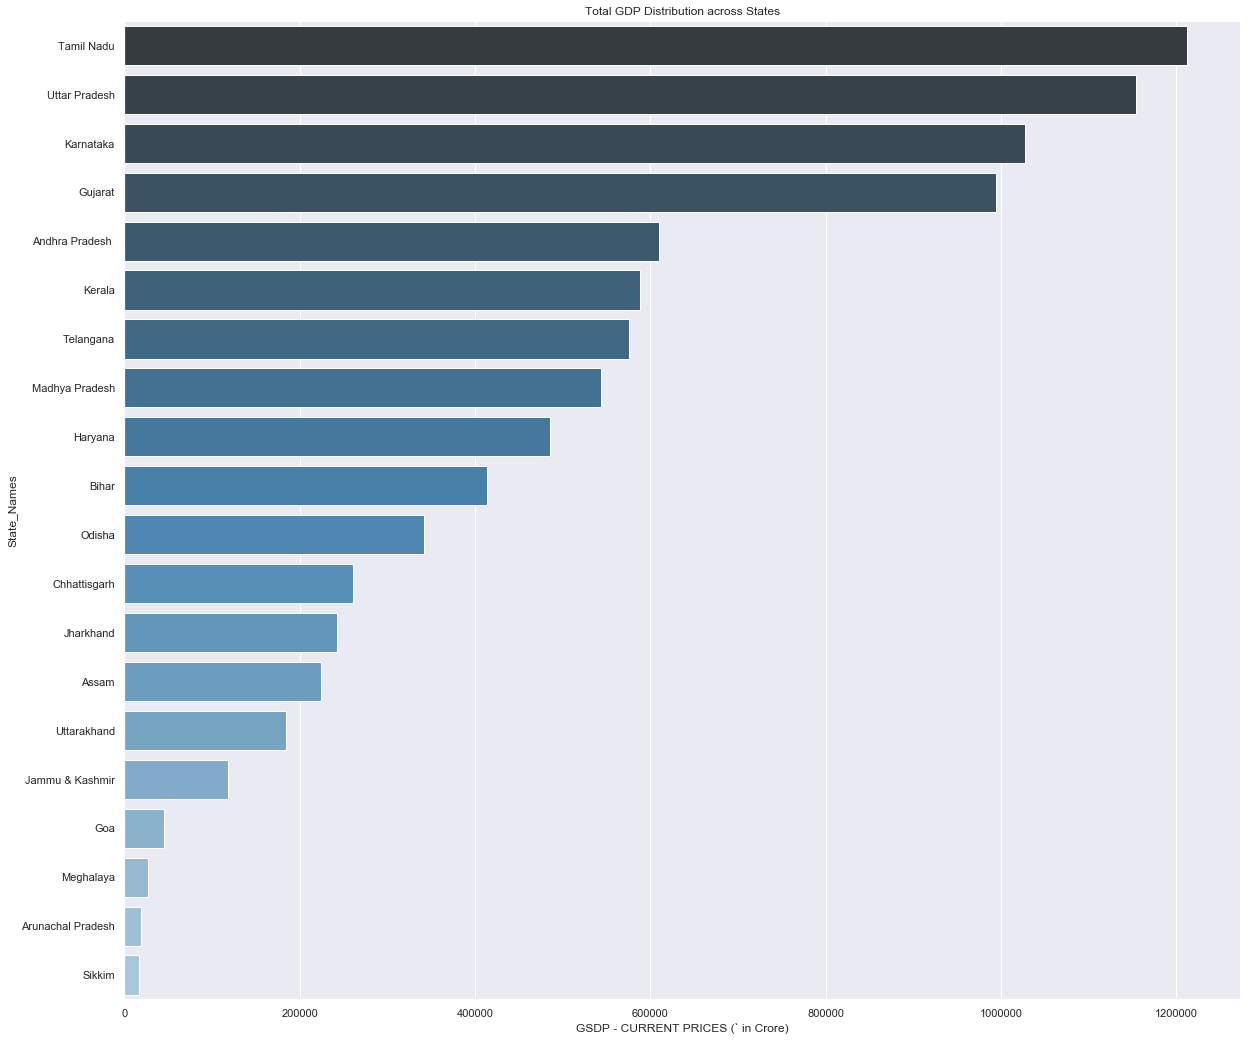

In [1544]:
#Creating a horizontal barplot with Total GDP Distibution for each state using seaborn
sns.set(rc={'figure.figsize':(20,18)}) #Setting the figure size to proper viewing
sns.barplot(x='GSDP - CURRENT PRICES (` in Crore)',y='State_Names',data=GDP_Total,palette='Blues_d').set_title("Total GDP Distribution across States")

#### The top 5 and the bottom 5 states based on total GDP.

In [1545]:
top_5=GDP_Total.iloc[0:5] #Top 5 states with highest GDP
bottom_5=GDP_Total.iloc[-6:-1] #Bottom 5 states with lowest GDP
top_5.reset_index(drop=True) #Resetting the index column
#bottom_5.reset_index(drop=True)

Items Description,State_Names,GSDP - CURRENT PRICES (` in Crore)
0,Tamil Nadu,1.21267e+06
1,Uttar Pradesh,1.1538e+06
2,Karnataka,1.02707e+06
3,Gujarat,994316
4,Andhra Pradesh,609934


# Part 1-B

In [1546]:
#Path where all the files are stored
path=r'C:\Apps\Abhinav DND\Upgrad\EDA and Statistics\Exploratory Data Analysis\GDP Analysis\Progress\Data I-B'
#Reading all the paths
all_files=glob.glob(path+"/*.csv")

#Empty list to add all the dataframes
li=[]

#loop to read each file with the path given in the filename variable
for filename in all_files:
    #Reading each file as pandas dataframe
    df=pd.read_csv(filename,index_col=None,header=0,engine='python')
    #Selecting only required columns
    df=df[['Item','2014-15']]
    #Transposing the data
    df=df.T
    #Taking the header row
    new_header=df.iloc[0] #Grab the firt row of th header
    df=df[1:] #Take the data apart from the header row
    #Assign the new header
    df.columns=new_header
    #Add the section name from the filename
    df['State_Name']=filename.split('\\')[-1].split('-')[1]
    #Append the final df to the list
    li.append(df)

#Creating a final df by joining all the df's in list li 
frame=pd.concat(li,axis=0,ignore_index=True,sort=False)

## Filtering out the list of Union Territories

In [1547]:
#Putting list of all Union Territories in a list
UT=['Delhi','Chandigarh','Andaman_Nicobar_Islands','Puducherry']
#Selecting the required dataframe without these Union Territories
frame=frame[~frame['State_Name'].isin(UT)] 

## Plot the GDP per capita for all the states

In [1593]:
#Assigning State_Name and Per Capita GSDP (Rs.) to a new dataraframe GDPperCapita and sorting it by Per Capita GSDP (Rs.) descending
GDPperCapita=frame[['State_Name','Per Capita GSDP (Rs.)']].sort_values(by='Per Capita GSDP (Rs.)',ascending=False)

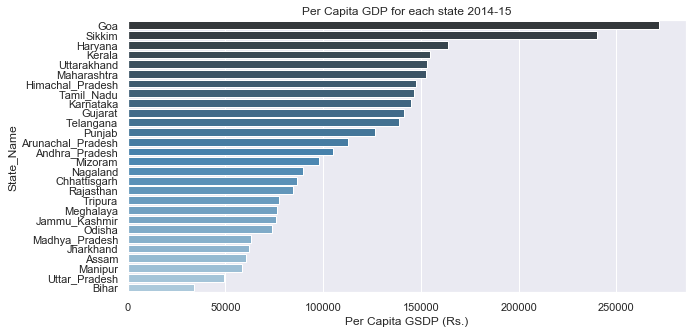

In [1594]:
#Creating a horizontal barplot with Per Capita GDP for each state using seaborn
sns.barplot(x='Per Capita GSDP (Rs.)',y='State_Name',data=GDPperCapita,palette='Blues_d').set_title("Per Capita GDP for each state 2014-15")
sns.set(rc={'figure.figsize':(20,18)}) #Setting the figure size to proper viewing

#### Identify the top 5 and the bottom 5 states based on the GDP per capita.

In [1598]:
Top5_GDPperCapita=GDPperCapita.iloc[0:5] #Selecting first 5 rows of the sorted dataframe GDPperCapita
Bottom5_GDPperCapita=GDPperCapita.iloc[-5:] #Selecting last 5 rows of the sorted dataframe GDPperCapita
Top5_GDPperCapita=Top5_GDPperCapita.reset_index(drop=True) #Resetting index
Bottom_GDPperCapita=Bottom5_GDPperCapita.reset_index(drop=True) #Resetting index
Bottom5_GDPperCapita.head()
#Top5_GDPperCapita.head()

,State_Name,Per Capita GSDP (Rs.)
13,Jharkhand,62091
3,Assam,60621
18,Manipur,58442
31,Uttar_Pradesh,49450
4,Bihar,33954


#### Ratio of the highest per capita GDP to the lowest per capita GDP

In [1551]:
#Determing GDP Value Ratio of Goa over Bihar
HighToLow=GDPperCapita['Per Capita GSDP (Rs.)'].max()/GDPperCapita['Per Capita GSDP (Rs.)'].min() 
print(HighToLow)

8.004741709371503


## Percentage contribution of the primary, secondary and tertiary sectors as a percentage of the total GDP for all the states.

In [1552]:
#Creating a new dataframe Percentage_Contribution with the required columns
Percentage_Contribution=frame[['State_Name','Primary','Secondary','Tertiary','Gross State Domestic Product']]
#Converting the required columns datatype to numeric from object for calculations
Percentage_Contribution[['Primary','Secondary','Tertiary','Gross State Domestic Product']]=Percentage_Contribution[['Primary','Secondary','Tertiary','Gross State Domestic Product']].apply(pd.to_numeric)

In [1553]:
#Calculating % of Primary sector over Total GDP for each state and finally showing it as percentage values
Percentage_Contribution['%_Primary']=round(100*(Percentage_Contribution['Primary']/Percentage_Contribution['Gross State Domestic Product']),2)
#Calculating % of Secondary sector over Total GDP for each state and finally showing it as percentage values
Percentage_Contribution['%_Secondary']=round(100*(Percentage_Contribution['Secondary']/Percentage_Contribution['Gross State Domestic Product']),2)
#Calculating % of Tertiary sector over Total GDP for each state and finally showing it as percentage values
Percentage_Contribution['%_Tertiary']=round(100*(Percentage_Contribution['Tertiary']/Percentage_Contribution['Gross State Domestic Product']),2)

In [1554]:
#Dropping the un-necessary columns and finally sorting the dataframe by GSDP values
Percentage_Contribution=Percentage_Contribution.drop(['Primary','Secondary','Tertiary'],1).sort_values(by='Gross State Domestic Product',ascending=False)

In [1555]:
#After sorting removing the GSDP column as well
Percentage_Contribution=Percentage_Contribution.drop('Gross State Domestic Product',1)

In [1556]:
Percentage_Contribution.head(20)#Checking the % values

,State_Name,%_Primary,%_Secondary,%_Tertiary
17,Maharashtra,12.14,26.47,49.46
27,Tamil_Nadu,12.20,30.06,48.82
31,Uttar_Pradesh,24.92,24.49,44.06
14,Karnataka,13.09,22.22,54.77
9,Gujarat,17.75,36.90,33.76
25,Rajasthan,31.22,21.28,42.50
1,Andhra_Pradesh,30.97,19.92,41.85
15,Kerala,12.34,22.95,56.41
28,Telangana,17.87,19.41,55.70
16,Madhya_Pradesh,37.04,20.84,37.59


In [1557]:
Percentage_Contribution=Percentage_Contribution.sort_values(by=['%_Primary','%_Secondary','%_Tertiary'])
Percentage_Contribution.set_index('State_Name',inplace=True)

<Figure size 1440x1080 with 0 Axes>

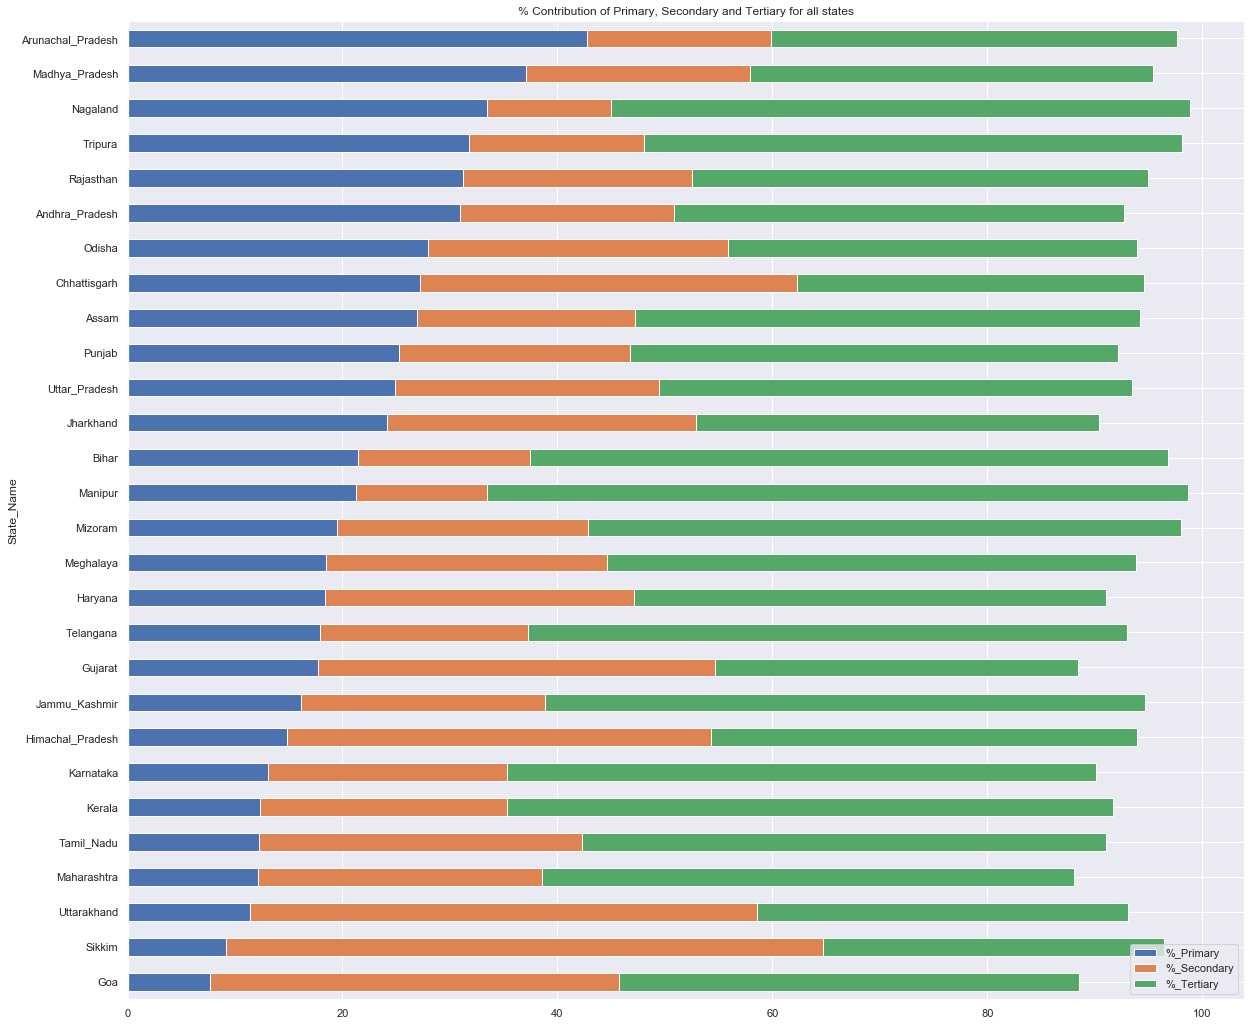

<Figure size 1440x1080 with 0 Axes>

In [1558]:
Percentage_Contribution[['%_Primary','%_Secondary','%_Tertiary']].plot.barh(stacked=True)
plt.title('% Contribution of Primary, Secondary and Tertiary for all states') #Giving title to the bar graph
plt.figure(figsize=(20,15)) #Adjusting the size of the graph

## Categorizing the states into four groups based on the GDP per capita (C1, C2, C3, C4)

In [1608]:
frame1=frame.copy()

In [1609]:
#Creating 4 new variables to store the values of quantiles of GDP per capita i.e. 0.2,0.5,0.85 and 1
C4,C3,C2,C1=frame1['Per Capita GSDP (Rs.)'].quantile([0.2,0.5,0.85,1])

In [1610]:
#Creating a function named category categorizing Per Capita GDP
def category(x):  #Creating function category and passing x as argument
    if 0<=x<C4:   #checking whether x is equal to or greater than 0 and less than 0.2 quantile value
        return str("C4")     #returning Category C4
    elif C4<=x<C3:
        return str("C3")
    elif C3<=x<C2:
        return str("C2")
    elif C2<=x<=C1:
        return str("C1")
        
frame1['Category']=frame1['Per Capita GSDP (Rs.)'].apply(category)   #Applying categories to the GDP per cpaita column using function category

In [1611]:
#Specifying the columns needed for category in a list
Required_Tags=['State_Name','Agriculture, forestry and fishing','Mining and quarrying','Manufacturing','Electricity, gas, water supply & other utility services','Construction','Trade, repair, hotels and restaurants','Transport, storage, communication & services related to broadcasting','Financial services','Real estate, ownership of dwelling & professional services','Public administration','Other services','Other services','Gross State Domestic Product','Per Capita GSDP (Rs.)','Category']

#Creating a new dataframe with the required columns for study
frame1=frame1[Required_Tags]

In [1563]:
C1_frame=frame1.loc[frame1['Category']=='C1'] #Creating dataframe with all C1 categories states 
C2_frame=frame1.loc[frame1['Category']=='C2'] #Creating dataframe with all C2 categories states
C3_frame=frame1.loc[frame1['Category']=='C3'] #Creating dataframe with all C3 categories states
C4_frame=frame1.loc[frame1['Category']=='C4'] #Creating dataframe with all C4 categories states

#Dropping the column category from the respective
C1_frame=C1_frame.drop('Category',1)
C2_frame=C2_frame.drop('Category',1)
C3_frame=C3_frame.drop('Category',1)
C4_frame=C4_frame.drop('Category',1)

##### C1 Category

In [1564]:
C1_frame=C1_frame.T #Transposing the dataframe
new_header=C1_frame.iloc[0] #Picking the header column
C1_frame=C1_frame[1:]       #Removing the header row and getting new dataframe
C1_frame.columns=new_header #Assigning the new column names
C1_frame=C1_frame.drop_duplicates() #dropping any duplicates

#Freeing the dataframe of State_names index
C1_frame.reset_index(inplace=True) #resetting the index
C1_frame.rename(columns={"index": "Sub-Sector"},inplace=True) #renaming the index column 

#List for all columns in c1_frame
li=list(C1_frame.columns)
li.remove('Sub-Sector')  #Remove Sub-Sector from list li

#Loop for converting all onject columns to numeric
for x in li:
    C1_frame[x]=C1_frame[x].apply(pd.to_numeric)
    
C1_frame['Total Sub Sector']=C1_frame.sum(axis=1)   #Sum of all sector values across the states

Total_GSDP_C1=C1_frame.iloc[-2]['Total Sub Sector'] #Picking the total sum of sector values

C1_frame['% Contribution']=round(100*(C1_frame['Total Sub Sector']/Total_GSDP_C1),2)  #Determing contribution of each sector to Total

C1_frame=C1_frame.sort_values(by='% Contribution',ascending=False) #sorting datafarme by % contribution

C1_frame=C1_frame[1:] #Removing All_India values to make graph clear

C1_frame['% Contribution Cum']=C1_frame['% Contribution'].cumsum() #Calculating cumulative sum of percentages

C1_frame=C1_frame.reset_index(drop=True) #resetting the index and dropping the index column

In [1565]:
C1_frame.head()

State_Name,Sub-Sector,Goa,Haryana,Kerala,Sikkim,Uttarakhand,Total Sub Sector,% Contribution,% Contribution Cum
0,Manufacturing,1177608,7756921.0,4273567,550697,5866252.0,19625045.0,16.61,16.61
1,"Agriculture, forestry and fishing",308507,8015238.0,5930617,137447,1601423.0,15993232.0,13.54,30.15
2,"Trade, repair, hotels and restaurants",380927,4986319.0,8557345,70568,1743106.0,15738265.0,13.32,43.47
3,"Real estate, ownership of dwelling & professio...",407099,6970183.0,7287633,75330,831307.0,15571552.0,13.18,56.65
4,Construction,165819,3702571.0,7314003,82058,1342733.0,12607184.0,10.67,67.32


Text(0.5, 1.0, '% Contribution of Top Sub Sectors in C1 states ')

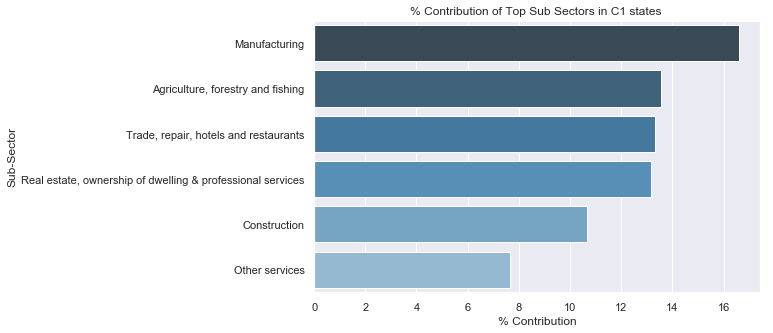

In [1566]:
Top_Sectors_C1=C1_frame.loc[C1_frame['% Contribution Cum']<=80]  #Top sectors with cumulative sum of less than equal to 80%

#Plotting a bar graph showing % contribution of seb -sectors for all C1 states
sns.set(rc={'figure.figsize':(8,5)})  #Setting the figure size to proper viewing
sns.barplot(x='% Contribution',y='Sub-Sector',data=Top_Sectors_C1,palette='Blues_d').set_title("% Contribution of Top Sub Sectors in C1 states ")


In [1567]:
Top_Sectors_C1.corr()  #finding correlations on top sectors for study

State_Name,Goa,Haryana,Kerala,Sikkim,Uttarakhand,Total Sub Sector,% Contribution,% Contribution Cum
State_Name,,,,,,,,
Goa,1.000000,0.596809,-0.611653,0.925604,0.953510,0.803569,0.803288,-0.786984
Haryana,0.596809,1.000000,-0.280728,0.407614,0.472881,0.891718,0.891941,-0.849582
Kerala,-0.611653,-0.280728,1.000000,-0.830359,-0.669759,-0.230299,-0.230205,0.429360
Sikkim,0.925604,0.407614,-0.830359,1.000000,0.963136,0.584689,0.584408,-0.674108
Uttarakhand,0.953510,0.472881,-0.669759,0.963136,1.000000,0.717017,0.716741,-0.770701
Total Sub Sector,0.803569,0.891718,-0.230299,0.584689,0.717017,1.000000,1.000000,-0.918960
% Contribution,0.803288,0.891941,-0.230205,0.584408,0.716741,1.000000,1.000000,-0.919006
% Contribution Cum,-0.786984,-0.849582,0.429360,-0.674108,-0.770701,-0.918960,-0.919006,1.000000


##### C2 Category

In [1568]:
C2_frame=C2_frame.T #Transposing the dataframe
new_header=C2_frame.iloc[0] #Picking the header column
C2_frame=C2_frame[1:]       #Removing the header row and getting new dataframe
C2_frame.columns=new_header #Assigning the new column names
C2_frame=C2_frame.drop_duplicates() #dropping any duplicates

#Freeing the dataframe of State_names index
C2_frame.reset_index(inplace=True) #resetting the index
C2_frame.rename(columns={"index": "Sub-Sector"},inplace=True) #renaming the index column 

#List for all columns in C2_frame
li=list(C2_frame.columns)
li.remove('Sub-Sector')  #Remove Sub-Sector from list li

#Loop for converting all onject columns to numeric
for x in li:
    C2_frame[x]=C2_frame[x].apply(pd.to_numeric)
    
C2_frame['Total Sub Sector']=C2_frame.sum(axis=1)   #Sum of all sector values across the states

Total_GSDP_C2=C2_frame.iloc[-2]['Total Sub Sector'] #Picking the total sum of sector values

C2_frame['% Contribution']=round(100*(C2_frame['Total Sub Sector']/Total_GSDP_C2),2)  #Determing contribution of each sector to Total

C2_frame=C2_frame.sort_values(by='% Contribution',ascending=False) #sorting datafarme by % contribution

C2_frame=C2_frame[1:] #Removing All_India values to make graph clear

C2_frame['% Contribution Cum']=C2_frame['% Contribution'].cumsum() #Calculating cumulative sum of percentages

C2_frame=C2_frame.reset_index(drop=True)  #resetting the index and dropping the index column

In [1603]:
C2_frame.head(2)

State_Name,Sub-Sector,Andhra_Pradesh,Arunachal_Pradesh,Gujarat,Himachal_Pradesh,Karnataka,Maharashtra,Punjab,Tamil_Nadu,Telangana,Total Sub Sector,% Contribution,% Contribution Cum
0,Manufacturing,4672266,26120,24087538.0,2543637,12953843,33660294,4790341,18914794,6353711,108002544.0,17.34,17.34
1,"Real estate, ownership of dwelling & professio...",4405409,48418,5179502.0,1125937,24766393,30718051,3142786,16830213,9478839,95695548.0,15.36,32.70


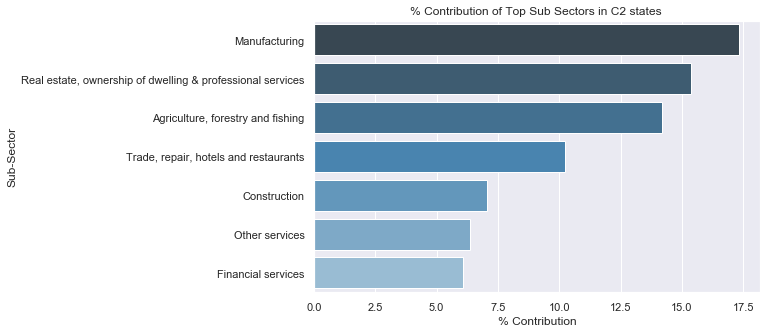

In [1569]:
Top_Sectors_C2=C2_frame.loc[C2_frame['% Contribution Cum']<=80]  #Top sectors with cumulative sum of less than equal to 80%

#Plotting a bar graph showing % contribution of seb -sectors for all C2 states
sns.barplot(x='% Contribution',y='Sub-Sector',data=Top_Sectors_C2,palette='Blues_d').set_title("% Contribution of Top Sub Sectors in C2 states ")
sns.set(rc={'figure.figsize':(8,5)}) #Setting the figure size to proper viewing

In [1570]:
Top_Sectors_C2.corr()  #finding correlations on top sectors for study

State_Name,Andhra_Pradesh,Arunachal_Pradesh,Gujarat,Himachal_Pradesh,Karnataka,Maharashtra,Punjab,Tamil_Nadu,Telangana,Total Sub Sector,% Contribution,% Contribution Cum
State_Name,,,,,,,,,,,,
Andhra_Pradesh,1.000000,0.950614,0.324929,0.349501,0.136972,-0.066068,0.936159,0.221524,0.417319,0.405366,0.405689,-0.236476
Arunachal_Pradesh,0.950614,1.000000,0.098618,0.155623,-0.077437,-0.317301,0.839038,-0.065669,0.202366,0.130036,0.130392,0.039757
Gujarat,0.324929,0.098618,1.000000,0.877081,0.184683,0.605093,0.536922,0.688513,0.328069,0.749258,0.749432,-0.766798
Himachal_Pradesh,0.349501,0.155623,0.877081,1.000000,0.386502,0.689470,0.479383,0.755533,0.421151,0.815091,0.815248,-0.865915
Karnataka,0.136972,-0.077437,0.184683,0.386502,1.000000,0.771461,0.160555,0.744771,0.891787,0.777413,0.777190,-0.751860
Maharashtra,-0.066068,-0.317301,0.605093,0.689470,0.771461,1.000000,0.108929,0.770325,0.672350,0.860574,0.860422,-0.891537
Punjab,0.936159,0.839038,0.536922,0.479383,0.160555,0.108929,1.000000,0.314479,0.517988,0.543809,0.544121,-0.374556
Tamil_Nadu,0.221524,-0.065669,0.688513,0.755533,0.744771,0.770325,0.314479,1.000000,0.701292,0.903099,0.903025,-0.950855
Telangana,0.417319,0.202366,0.328069,0.421151,0.891787,0.672350,0.517988,0.701292,1.000000,0.831508,0.831405,-0.729861


##### C3 Category

In [1571]:

C3_frame=C3_frame.T #Transposing the dataframe
new_header=C3_frame.iloc[0] #Picking the header column
C3_frame=C3_frame[1:]       #Removing the header row and getting new dataframe
C3_frame.columns=new_header #Assigning the new column names
C3_frame=C3_frame.drop_duplicates() #dropping any duplicates

#Freeing the dataframe of State_names index
C3_frame.reset_index(inplace=True) #resetting the index
C3_frame.rename(columns={"index": "Sub-Sector"},inplace=True) #renaming the index column 

#List for all columns in C3_frame
li=list(C3_frame.columns)
li.remove('Sub-Sector')  #Remove Sub-Sector from list li

#Loop for converting all onject columns to numeric
for x in li:
    C3_frame[x]=C3_frame[x].apply(pd.to_numeric)
    
C3_frame['Total Sub Sector']=C3_frame.sum(axis=1)   #Sum of all sector values across the states

Total_GSDP_C3=C3_frame.iloc[-2]['Total Sub Sector'] #Picking the total sum of sector values

C3_frame['% Contribution']=round(100*(C3_frame['Total Sub Sector']/Total_GSDP_C3),2)  #Determing contribution of each sector to Total

C3_frame=C3_frame.sort_values(by='% Contribution',ascending=False) #sorting datafarme by % contribution

C3_frame=C3_frame[1:] #Removing All_India values to make graph clear

C3_frame['% Contribution Cum']=C3_frame['% Contribution'].cumsum() #Calculating cumulative sum of percentages

C3_frame=C3_frame.reset_index(drop=True)  #resetting the index and dropping the index column

In [1605]:
C3_frame.head(2)

State_Name,Sub-Sector,Chhattisgarh,Jammu_Kashmir,Meghalaya,Mizoram,Nagaland,Odisha,Rajasthan,Tripura,Total Sub Sector,% Contribution,% Contribution Cum
0,"Agriculture, forestry and fishing",3948847,1586705,366521.0,217010,607897,6422978,15044394,799825.0,28994177.0,21.42,21.42
1,Manufacturing,4370593,893207,433213.0,8479,18346,5754229,6552580,228625.0,18259272.0,13.49,34.91


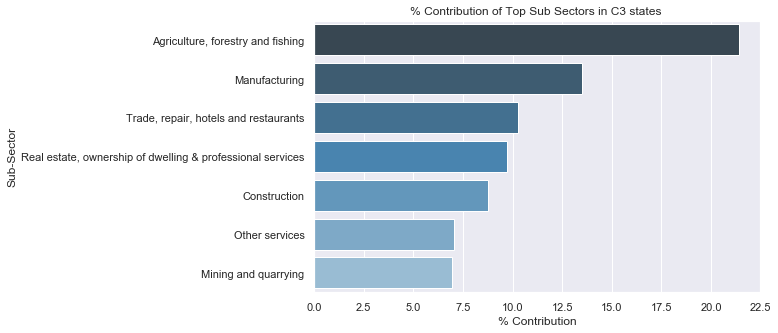

In [1572]:
Top_Sectors_C3=C3_frame.loc[C3_frame['% Contribution Cum']<=80]  #Top sectors with cumulative sum of less than equal to 80%

#Plotting a bar graph showing % contribution of seb -sectors for all C3 states
sns.barplot(x='% Contribution',y='Sub-Sector',data=Top_Sectors_C3,palette='Blues_d').set_title("% Contribution of Top Sub Sectors in C3 states ")
sns.set(rc={'figure.figsize':(8,5)}) #Setting the figure size to proper viewing

In [1573]:
Top_Sectors_C3.corr()  #finding correlations on top sectors for study

State_Name,Chhattisgarh,Jammu_Kashmir,Meghalaya,Mizoram,Nagaland,Odisha,Rajasthan,Tripura,Total Sub Sector,% Contribution,% Contribution Cum
State_Name,,,,,,,,,,,
Chhattisgarh,1.000000,0.262823,0.433886,-0.216756,0.165388,0.825394,0.540781,0.272396,0.717337,0.717405,-0.673652
Jammu_Kashmir,0.262823,1.000000,0.461931,0.577666,0.741012,0.456239,0.716985,0.663185,0.685456,0.685491,-0.719793
Meghalaya,0.433886,0.461931,1.000000,0.173892,0.266494,0.775435,0.548804,0.557348,0.654416,0.654488,-0.843963
Mizoram,-0.216756,0.577666,0.173892,1.000000,0.861030,0.146919,0.525357,0.733581,0.394358,0.394341,-0.260634
Nagaland,0.165388,0.741012,0.266494,0.861030,1.000000,0.473346,0.839394,0.916013,0.737254,0.737184,-0.547438
Odisha,0.825394,0.456239,0.775435,0.146919,0.473346,1.000000,0.780248,0.681687,0.910736,0.910739,-0.885696
Rajasthan,0.540781,0.716985,0.548804,0.525357,0.839394,0.780248,1.000000,0.921991,0.963399,0.963378,-0.859788
Tripura,0.272396,0.663185,0.557348,0.733581,0.916013,0.681687,0.921991,1.000000,0.853137,0.853065,-0.732074
Total Sub Sector,0.717337,0.685456,0.654416,0.394358,0.737254,0.910736,0.963399,0.853137,1.000000,1.000000,-0.924372


##### C4 Category

In [1574]:
C4_frame=C4_frame.T #Transposing the dataframe
new_header=C4_frame.iloc[0] #Picking the header column
C4_frame=C4_frame[1:]       #Removing the header row and getting new dataframe
C4_frame.columns=new_header #Assigning the new column names
C4_frame=C4_frame.drop_duplicates() #dropping any duplicates

#Freeing the dataframe of State_names index
C4_frame.reset_index(inplace=True) #resetting the index
C4_frame.rename(columns={"index": "Sub-Sector"},inplace=True) #renaming the index column 

#List for all columns in C4_frame
li=list(C4_frame.columns)
li.remove('Sub-Sector')  #Remove Sub-Sector from list li

#Loop for converting all onject columns to numeric
for x in li:
    C4_frame[x]=C4_frame[x].apply(pd.to_numeric)
    
C4_frame['Total Sub Sector']=C4_frame.sum(axis=1)   #Sum of all sector values across the states

Total_GSDP_C4=C4_frame.iloc[-2]['Total Sub Sector'] #Picking the total sum of sector values

C4_frame['% Contribution']=round(100*(C4_frame['Total Sub Sector']/Total_GSDP_C4),2)  #Determing contribution of each sector to Total

C4_frame=C4_frame.sort_values(by='% Contribution',ascending=False) #sorting datafarme by % contribution

C4_frame=C4_frame[1:] #Removing All_India values to make graph clear

C4_frame['% Contribution Cum']=C4_frame['% Contribution'].cumsum() #Calculating cumulative sum of percentages

C4_frame=C4_frame.reset_index(drop=True)  #resetting the index and dropping the index column

In [1606]:
C4_frame.head()

State_Name,Sub-Sector,Assam,Bihar,Jharkhand,Madhya_Pradesh,Manipur,Uttar_Pradesh,Total Sub Sector,% Contribution,% Contribution Cum
0,"Agriculture, forestry and fishing",3855548,7951890,3211065,16235647,383140.0,25097754,56735044.0,24.32,24.32
1,"Trade, repair, hotels and restaurants",2987155,7448373,1991359,5357515,262950.0,9437243,27484595.0,11.78,36.10
2,Manufacturing,2002936,2189965,4114148,4368833,49501.0,12261649,24987032.0,10.71,46.81
3,"Real estate, ownership of dwelling & professio...",1412466,3740641,1656784,2660123,159335.0,14548185,24177534.0,10.37,57.18
4,Construction,1733568,3449763,1789834,4403151,143182.0,11256450,22775948.0,9.76,66.94


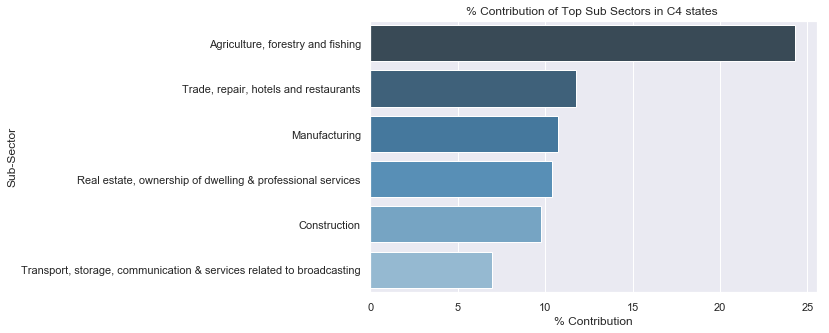

In [1575]:
Top_Sectors_C4=C4_frame.loc[C4_frame['% Contribution Cum']<=80]  #Top sectors with cumulative sum of less than equal to 80%

#Plotting a bar graph showing % contribution of seb -sectors for all C4 states
sns.barplot(x='% Contribution',y='Sub-Sector',data=Top_Sectors_C4,palette='Blues_d').set_title("% Contribution of Top Sub Sectors in C4 states ")
sns.set(rc={'figure.figsize':(8,5)}) #Setting the figure size to proper viewing

In [1576]:
Top_Sectors_C4.corr()  #finding correlations on top sectors for study

State_Name,Assam,Bihar,Jharkhand,Madhya_Pradesh,Manipur,Uttar_Pradesh,Total Sub Sector,% Contribution,% Contribution Cum
State_Name,,,,,,,,,
Assam,1.000000,0.882162,0.461065,0.886916,0.866028,0.705077,0.892617,0.892490,-0.938550
Bihar,0.882162,1.000000,0.009741,0.736089,0.960000,0.539754,0.744612,0.744567,-0.784834
Jharkhand,0.461065,0.009741,1.000000,0.449554,0.017621,0.460572,0.473255,0.473159,-0.589325
Madhya_Pradesh,0.886916,0.736089,0.449554,1.000000,0.842663,0.888865,0.980069,0.979989,-0.777283
Manipur,0.866028,0.960000,0.017621,0.842663,1.000000,0.713690,0.852378,0.852377,-0.748381
Uttar_Pradesh,0.705077,0.539754,0.460572,0.888865,0.713690,1.000000,0.942140,0.942260,-0.701652
Total Sub Sector,0.892617,0.744612,0.473255,0.980069,0.852378,0.942140,1.000000,1.000000,-0.839160
% Contribution,0.892490,0.744567,0.473159,0.979989,0.852377,0.942260,1.000000,1.000000,-0.839154
% Contribution Cum,-0.938550,-0.784834,-0.589325,-0.777283,-0.748381,-0.701652,-0.839160,-0.839154,1.000000


# Part 2

In [1577]:
#Importing the Data II csv into a dataframe
dropout_rate=pd.read_csv(r'C:\Apps\Abhinav DND\Upgrad\EDA and Statistics\Exploratory Data Analysis\GDP Analysis\Progress\Data II.csv')

In [1578]:
#Creating the desired dataframe by removing all other columns and keeping only States and Primary,Upper Primary and Seondary drop out rates
dropout_rate=dropout_rate[['Level of Education - State','Primary - 2014-2015','Upper Primary - 2014-2015','Secondary - 2014-2015']]

In [1579]:
#Renaming the column names to desired ones i.e Level of Education - State"to "State_Name 
#Required for merging with frame1 dataframe above for study
dropout_rate.rename(columns={"Level of Education - State": "State_Name","Primary - 2014-2015":"Primary Drop Out Rate","Upper Primary - 2014-2015":"Upper Primary Drop Out Rate","Secondary - 2014-2015":"Secondary Drop Out Rate"},inplace=True)

In [1580]:
#Converting the state names with spaces to underscore to align with frame1 for merging as key
dropout_rate['State_Name']=dropout_rate['State_Name'].str.replace(' ','_')

#Renaming some states manually to avoid merge errors
dropout_rate['State_Name']=dropout_rate['State_Name'].str.replace('Chhatisgarh','Chhattisgarh')
dropout_rate['State_Name']=dropout_rate['State_Name'].str.replace('Jammu_and_Kashmir','Jammu_Kashmir')

In [1581]:
#Merging the datadrame frame1 with droout rates with common State Names thus removing Union Territories
merged_dataset=pd.merge(frame1,dropout_rate,how='inner',on='State_Name')
merged_dataset.head() #checking the dataframe

,State_Name,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Other services,Gross State Domestic Product,Per Capita GSDP (Rs.),Category,Primary Drop Out Rate,Upper Primary Drop Out Rate,Secondary Drop Out Rate
0,Andhra_Pradesh,14819416,1484300,4672266,1151729,4664889,4233400,5076984,1900863,4405409,2200897,4215389,4215389,52646842,104977,C2,6.72,5.20,15.71
1,Arunachal_Pradesh,686117,30842,26120,113527,147842,60421,35203,25207,48418,243867,218728,218728,1676119,112718,C2,10.82,6.71,17.11
2,Assam,3855548,1471149,2002936,296587,1733568,2987155,1194568,543651,1412466,1373611,1795658,1795658,19809800,60621,C4,15.36,10.51,27.06
3,Bihar,7951890,68107,2189965,345168,3449763,7448373,3147173,1178022,3740641,2078171,4587589,4587589,37391988,33954,C4,NaN,4.08,25.90
4,Chhattisgarh,3948847,2451970,4370593,1198438,2669855,1535571,871770,739057,2462166,867982,1112232,1112232,23498180,86860,C3,2.91,5.85,21.26


In [1582]:
#Converting the necesary columns to numeric for further calculation
merged_dataset['Per Capita GSDP (Rs.)']=merged_dataset['Per Capita GSDP (Rs.)'].apply(pd.to_numeric)
merged_dataset['Primary Drop Out Rate']=merged_dataset['Primary Drop Out Rate'].apply(pd.to_numeric)
merged_dataset['Upper Primary Drop Out Rate']=merged_dataset['Upper Primary Drop Out Rate'].apply(pd.to_numeric)
merged_dataset['Secondary Drop Out Rate']=merged_dataset['Secondary Drop Out Rate'].apply(pd.to_numeric)

In [1583]:
#Assigning x and y values for scatter plots for all three sectors
x_primary,y_primary=merged_dataset['Per Capita GSDP (Rs.)'],merged_dataset['Primary Drop Out Rate']
x_u_primary,y_u_primary=merged_dataset['Per Capita GSDP (Rs.)'],merged_dataset['Upper Primary Drop Out Rate']
x_secondary,y_secondary=merged_dataset['Per Capita GSDP (Rs.)'],merged_dataset['Secondary Drop Out Rate']

Text(0.5, 1.0, 'Primary Drop out rates vs Per Capita GDP')

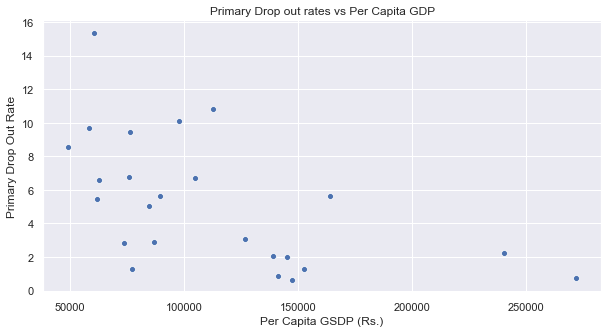

In [1584]:
#Plotting Scatter plot for Per Capita GDP Rates vs Primary Drop Out Rates
sns.set(rc={'figure.figsize':(10,5)}) #Setting the figure size to optimal vieweing
sns.scatterplot(x_primary,y_primary) #building the scatter plot
#Assigning title to the plot
ax = plt.gca()
ax.set_title("Primary Drop out rates vs Per Capita GDP")


Text(0.5, 1.0, 'Upper Primary Drop out rates vs Per Capita GDP')

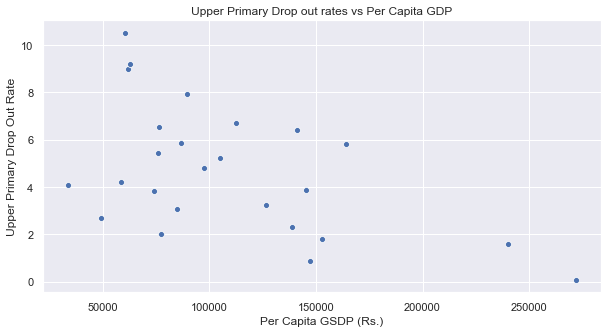

In [1585]:
#Plotting Scatter plot for Per Capita GDP Rates vs Upper Primary Drop Out Rates
sns.scatterplot(x_u_primary,y_u_primary) #building the scatter plot
#Assigning title to the plot
ax = plt.gca()
ax.set_title("Upper Primary Drop out rates vs Per Capita GDP")

Text(0.5, 1.0, 'Secondary Drop out rates vs Per Capita GDP')

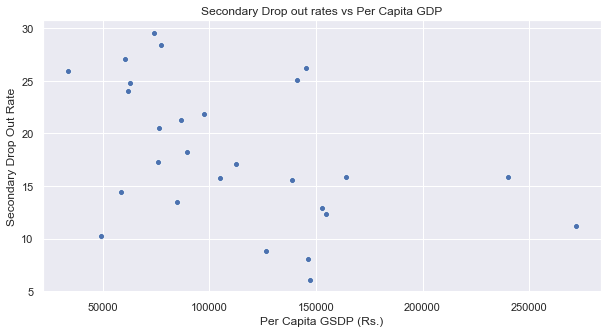

In [1586]:
#Plotting Scatter plot for Per Capita GDP Rates vs Secondary Primary Drop Out Rates
sns.scatterplot(x_secondary,y_secondary) #building the scatter plot
ax = plt.gca() #Assigning title to the plot
ax.set_title("Secondary Drop out rates vs Per Capita GDP")

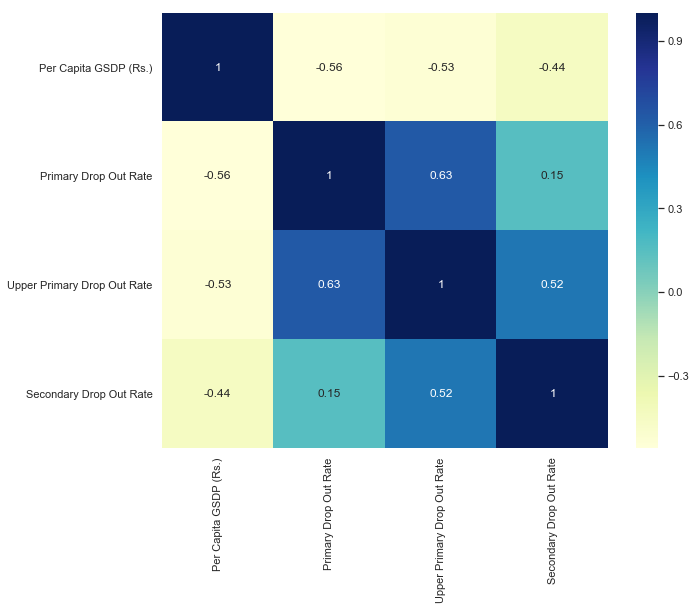

In [1587]:
#Finding correlations between per capita GDP with dropout rates in education.

#Setting up required dataframe for analysis
merged_dataset=merged_dataset[['Per Capita GSDP (Rs.)','Primary Drop Out Rate','Upper Primary Drop Out Rate','Secondary Drop Out Rate']]

#Building up correlation on the dataset
corr1=merged_dataset.corr()
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(corr1, cmap="YlGnBu", annot=True)
plt.show()